SVM - Accuracy: 0.8707
SVM - Precision: 0.8999
SVM - Recall: 0.9122
SVM - F1 Score: 0.9060
SVM - Confusion Matrix:
[[ 957  268]
 [ 232 2410]]

Multinomial Naive Bayes - Accuracy: 0.8580
Multinomial Naive Bayes - Precision: 0.8715
Multinomial Naive Bayes - Recall: 0.9292
Multinomial Naive Bayes - F1 Score: 0.8994
Multinomial Naive Bayes - Confusion Matrix:
[[ 863  362]
 [ 187 2455]]

Logistic Regression - Accuracy: 0.8735
Logistic Regression - Precision: 0.8977
Logistic Regression - Recall: 0.9198
Logistic Regression - F1 Score: 0.9086
Logistic Regression - Confusion Matrix:
[[ 948  277]
 [ 212 2430]]

Random Forest - Accuracy: 0.8648
Random Forest - Precision: 0.8982
Random Forest - Recall: 0.9046
Random Forest - F1 Score: 0.9014
Random Forest - Confusion Matrix:
[[ 954  271]
 [ 252 2390]]



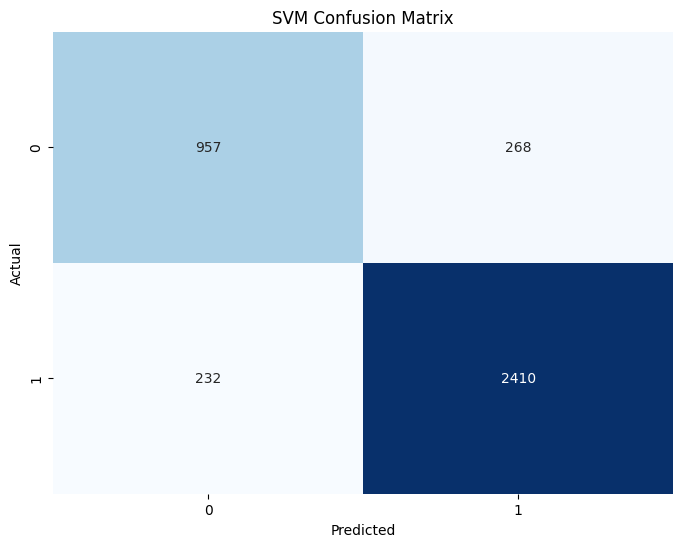

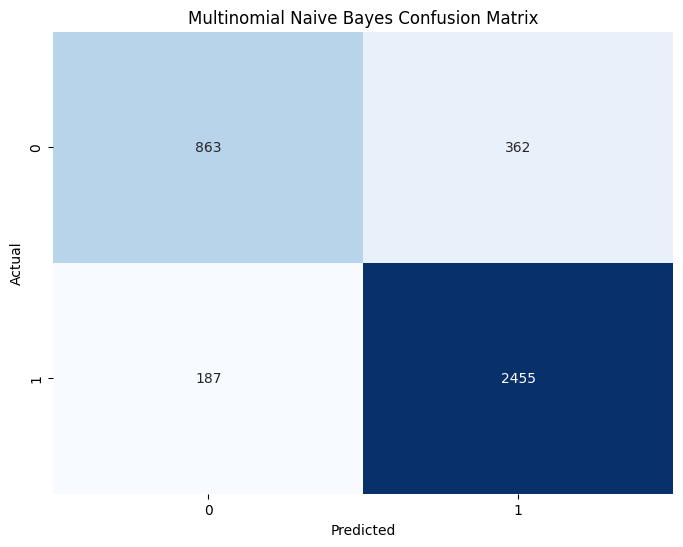

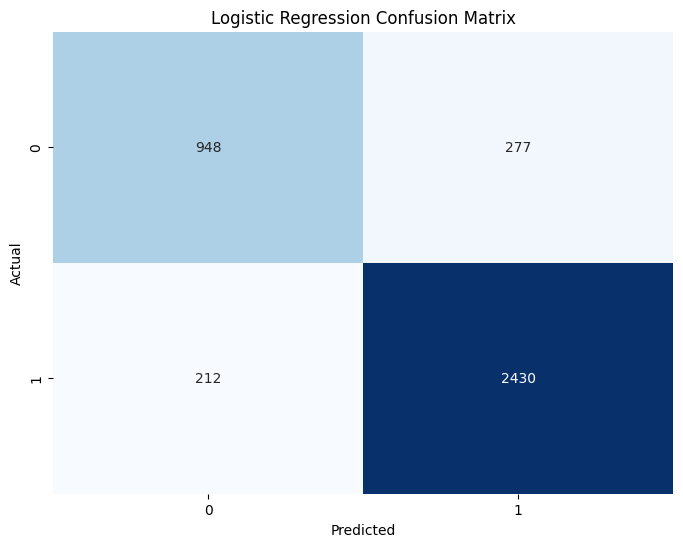

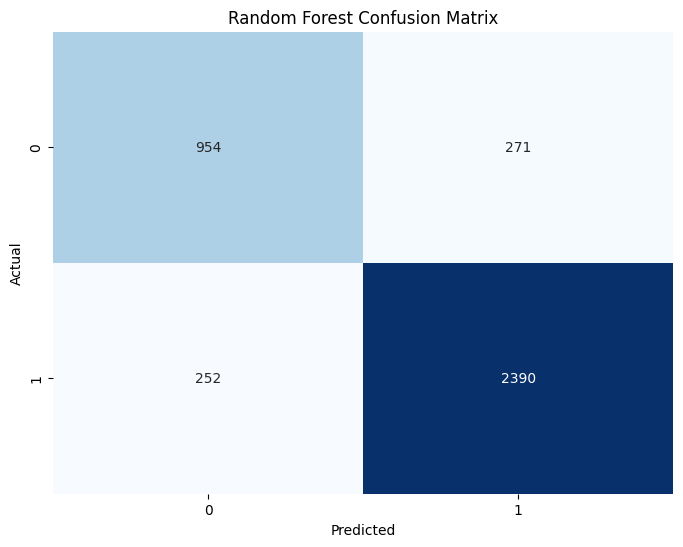

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df2 = pd.read_csv('/content/merged_data (1).csv')

# Handle missing values by imputing with empty strings
df2['Cleaned_Review'].fillna('', inplace=True)

# Split the data into training and testing sets
X = df2['Cleaned_Review']  # Text data
y_sentiment = df2['Sentiment']  # Positive or Negative labels
y_rating = df2['rating']  # Numeric ratings
# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
y_sentiment = label_encoder.fit_transform(y_sentiment)
X_train, X_test, y_sentiment_train, y_sentiment_test, y_rating_train, y_rating_test = train_test_split(
    X, y_sentiment, y_rating, test_size=0.2, random_state=42)

# Create TF-IDF vectors from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a sentiment analysis model using SVM
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_sentiment_train)

# Function to evaluate a classifier and print metrics
def evaluate_classifier(classifier, X_test_tfidf, y_test, classifier_name):
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'{classifier_name} - Accuracy: {accuracy:.4f}')
    print(f'{classifier_name} - Precision: {precision:.4f}')
    print(f'{classifier_name} - Recall: {recall:.4f}')
    print(f'{classifier_name} - F1 Score: {f1:.4f}')
    print(f'{classifier_name} - Confusion Matrix:\n{conf_matrix}\n')

    return y_pred

# Evaluate SVM
svm_pred = evaluate_classifier(svm_classifier, X_test_tfidf, y_sentiment_test, 'SVM')

# Evaluate Multinomial Naive Bayes
nb_pred = evaluate_classifier(nb_classifier, X_test_tfidf, y_sentiment_test, 'Multinomial Naive Bayes')

# Evaluate Logistic Regression
logistic_pred = evaluate_classifier(logistic_classifier, X_test_tfidf, y_sentiment_test, 'Logistic Regression')

# Evaluate Random Forest
rf_pred = evaluate_classifier(rf_classifier, X_test_tfidf, y_sentiment_test, 'Random Forest')

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_sentiment_test, svm_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_sentiment_test, nb_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_sentiment_test, logistic_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_sentiment_test, rf_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


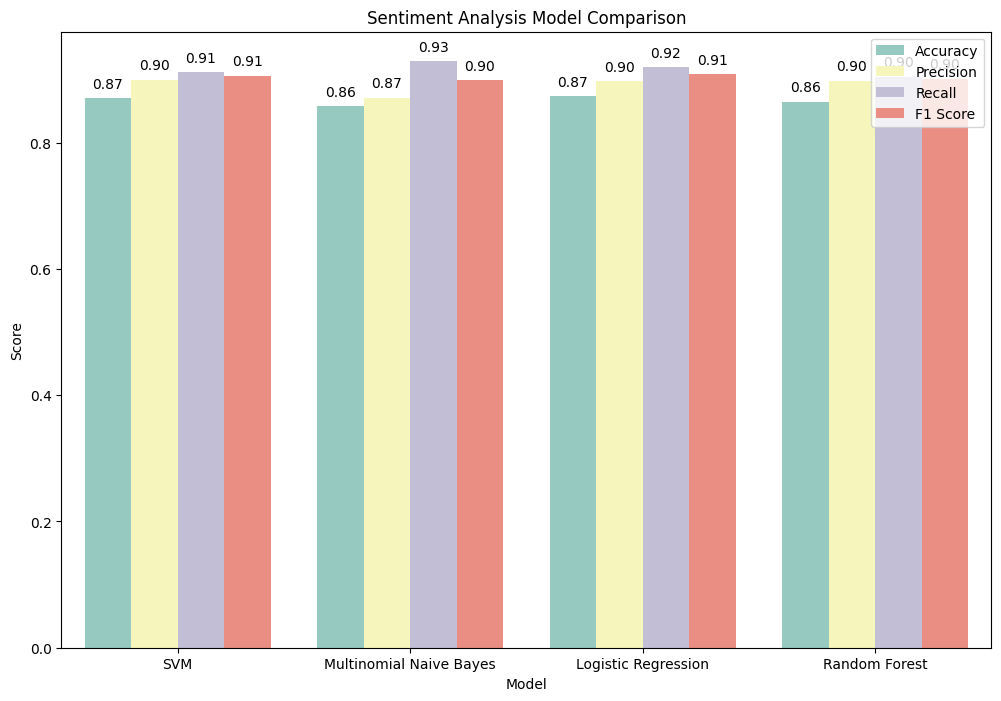

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data for comparison
models = ['SVM', 'Multinomial Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_sentiment_test, svm_pred),
                   accuracy_score(y_sentiment_test, nb_pred),
                   accuracy_score(y_sentiment_test, logistic_pred),
                   accuracy_score(y_sentiment_test, rf_pred)]
precision_scores = [precision_score(y_sentiment_test, svm_pred),
                    precision_score(y_sentiment_test, nb_pred),
                    precision_score(y_sentiment_test, logistic_pred),
                    precision_score(y_sentiment_test, rf_pred)]
recall_scores = [recall_score(y_sentiment_test, svm_pred),
                 recall_score(y_sentiment_test, nb_pred),
                 recall_score(y_sentiment_test, logistic_pred),
                 recall_score(y_sentiment_test, rf_pred)]
f1_scores = [f1_score(y_sentiment_test, svm_pred),
             f1_score(y_sentiment_test, nb_pred),
             f1_score(y_sentiment_test, logistic_pred),
             f1_score(y_sentiment_test, rf_pred)]

# Create a DataFrame for visualization
df_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df_comparison, id_vars='Model', var_name='Metric', value_name='Score')

# Create a grouped bar plot with values displayed on top of the bars
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='Set3')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Sentiment Analysis Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()


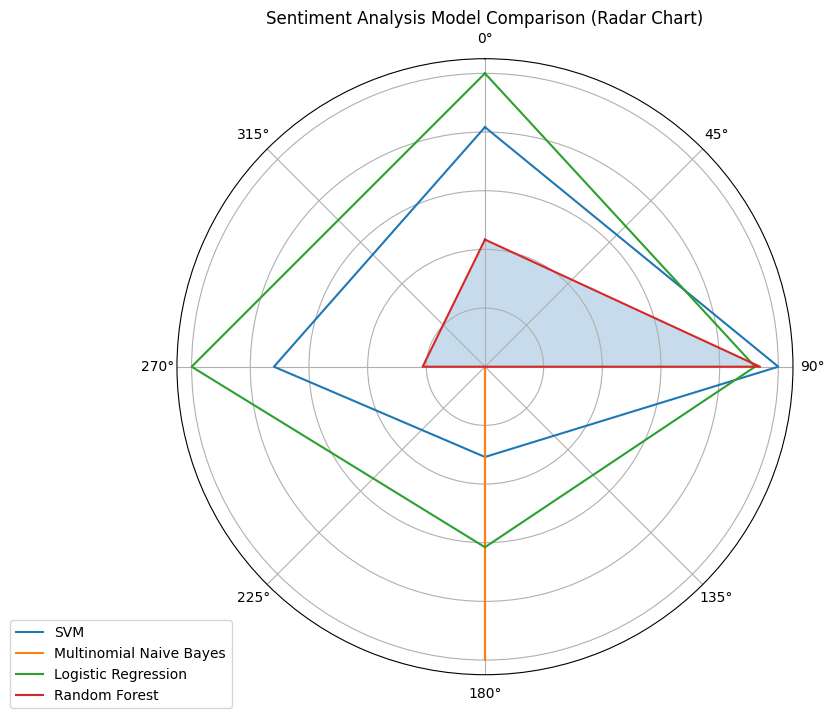

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for comparison
models = ['SVM', 'Multinomial Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_sentiment_test, svm_pred),
                   accuracy_score(y_sentiment_test, nb_pred),
                   accuracy_score(y_sentiment_test, logistic_pred),
                   accuracy_score(y_sentiment_test, rf_pred)]
precision_scores = [precision_score(y_sentiment_test, svm_pred),
                    precision_score(y_sentiment_test, nb_pred),
                    precision_score(y_sentiment_test, logistic_pred),
                    precision_score(y_sentiment_test, rf_pred)]
recall_scores = [recall_score(y_sentiment_test, svm_pred),
                 recall_score(y_sentiment_test, nb_pred),
                 recall_score(y_sentiment_test, logistic_pred),
                 recall_score(y_sentiment_test, rf_pred)]
f1_scores = [f1_score(y_sentiment_test, svm_pred),
             f1_score(y_sentiment_test, nb_pred),
             f1_score(y_sentiment_test, logistic_pred),
             f1_score(y_sentiment_test, rf_pred)]

# Create a DataFrame for visualization
df_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Normalize the values for the radar chart
min_max_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df_comparison_normalized = df_comparison.drop('Model', axis=1).apply(min_max_scaler)

# Plotting the radar chart
labels = df_comparison.columns[1:]
num_models = len(df_comparison)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Plot each model
for i in range(num_models):
    values = df_comparison_normalized.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=models[i])

ax.fill(angles, values, alpha=0.25)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Sentiment Analysis Model Comparison (Radar Chart)')
plt.show()


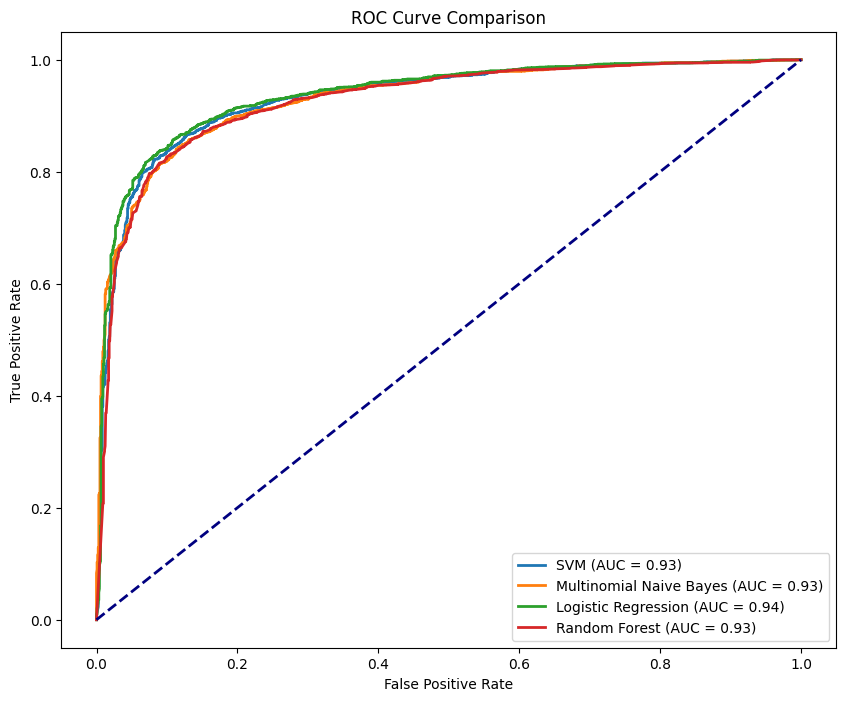

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
df2 = pd.read_csv('/content/merged_data (1).csv')

# Handle missing values by imputing with empty strings
df2['Cleaned_Review'].fillna('', inplace=True)

# Split the data into training and testing sets
X = df2['Cleaned_Review']  # Text data
y_sentiment = df2['Sentiment']  # Positive or Negative labels

X_train, X_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X, y_sentiment, test_size=0.2, random_state=42)

# Create TF-IDF vectors from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a sentiment analysis model using SVM
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)
svm_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Logistic Regression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_sentiment_train)

# Train a sentiment analysis model using Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_sentiment_train)

# Function to evaluate a classifier and accumulate ROC curve information
def evaluate_classifier(classifier, X_test_tfidf, y_test, classifier_name, roc_info):
    y_pred_proba = classifier.predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Append ROC curve information to the list
    roc_info.append({'Classifier': classifier_name, 'FPR': fpr, 'TPR': tpr, 'AUC': roc_auc})

# Initialize a list to store ROC curve information
roc_info_list = []

# Evaluate SVM and accumulate ROC curve information
evaluate_classifier(svm_classifier, X_test_tfidf, y_sentiment_test, 'SVM', roc_info_list)

# Evaluate Multinomial Naive Bayes and accumulate ROC curve information
evaluate_classifier(nb_classifier, X_test_tfidf, y_sentiment_test, 'Multinomial Naive Bayes', roc_info_list)

# Evaluate Logistic Regression and accumulate ROC curve information
evaluate_classifier(logistic_classifier, X_test_tfidf, y_sentiment_test, 'Logistic Regression', roc_info_list)

# Evaluate Random Forest and accumulate ROC curve information
evaluate_classifier(rf_classifier, X_test_tfidf, y_sentiment_test, 'Random Forest', roc_info_list)

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 8))
for roc_info in roc_info_list:
    plt.plot(roc_info['FPR'], roc_info['TPR'], lw=2, label=f"{roc_info['Classifier']} (AUC = {roc_info['AUC']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
